In [3]:
from pathlib import Path
from planet4 import p4io as io, markings, plotting
%matplotlib nbagg
import seaborn as sns
sns.set_style('white')

In [4]:
datapath = io.dropbox() / 'season23_by_id'
fnotchedpath = io.dropbox() / 'season23_by_id_fnotched_0.5'
pngpath = fnotchedpath.with_name(fnotchedpath.name + '_pipeline_check')
pngpath.mkdir(exist_ok=True)
dbpath = io.dropbox() / '2015-11-02_planet_four_classifications_queryable_cleaned_seasons2and3.h5'

In [5]:
image_ids = [i.stem.split('_')[0] for i in datapath.glob('*.hdf')]

In [6]:
image_ids = np.unique(image_ids)

In [29]:
from mpl_toolkits.axes_grid1 import AxesGrid

def plot_pipeline_check(image_id):
    resman = plotting.ResultManager(image_id, datapath)
    p4id = markings.ImageID(image_id,database_fname = str(dbpath))
    fig, axes = plt.subplots(2,3, figsize=(12,6), sharex=True,
                             sharey=True)
    axes = axes.ravel()
    # plot tile, blotch and fan markings
    p4id.show_subframe(ax=axes[0])
    p4id.plot_fans(ax=axes[1])
    p4id.plot_blotches(ax=axes[2])
    
    # plot clustered blotches and fans
    p4id.plot_fans(ax=axes[4],
                   fans=resman.fans(unfnotched=True))
    p4id.plot_blotches(ax=axes[5], 
                       blotches=resman.blotches(unfnotched=True))
    
    # plot fnotched results
    resman = plotting.ResultManager(image_id, fnotchedpath)
    p4id.plot_blotches(ax=axes[3], blotches=resman.blotches())
    p4id.plot_fans(ax=axes[3], fans=resman.fans())


    fig.subplots_adjust(left=None, top=None, bottom=None, right=None,
                        wspace=0.001, hspace=0.001)
    savepath = pngpath / (image_id + '_pipeline_check.pdf')
    fig.savefig(str(savepath), bbox_inches='tight')

<IPython.core.display.Javascript object>


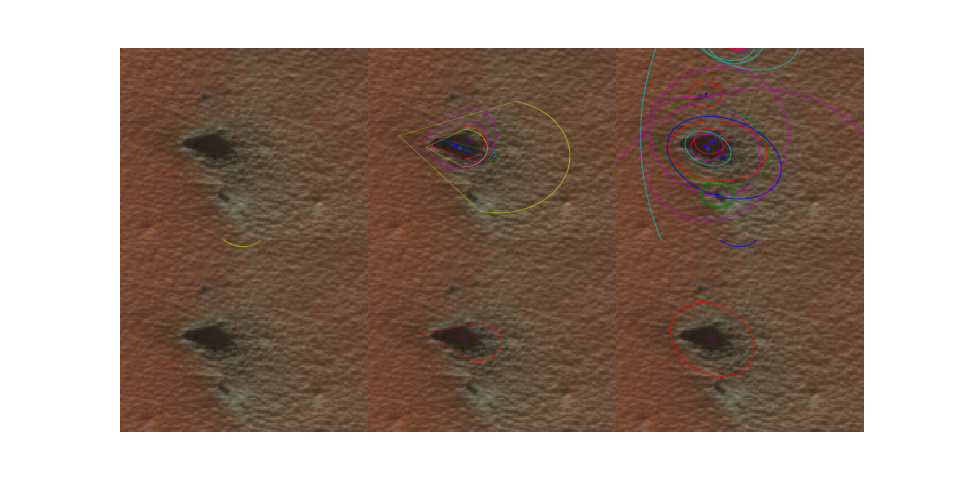

In [28]:
plot_pipeline_check('APF000036k')